<a href="https://colab.research.google.com/github/hritikbalguher/BigBasket_Project/blob/main/LoanProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Task 1: DATA EXPLORATION**

# **Define Library**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Load and Read Dataset**

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Loan_Train.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [ ]:
df.shape

(614, 13)

In [ ]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

# **Information Of Dataset**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


# **Check Null values**

In [ ]:
df.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [ ]:
df.isnull().sum()/df.shape[0]*100

,0
Loan_ID,0.000000
Gender,2.117264
Married,0.488599
Dependents,2.442997
Education,0.000000
Self_Employed,5.211726
ApplicantIncome,0.000000
CoapplicantIncome,0.000000
LoanAmount,3.583062
Loan_Amount_Term,2.280130


In [ ]:
df.duplicated().sum()

0

# **Handling Null Values**

In [ ]:
df.dropna(subset=['LoanAmount'], inplace=True)

In [ ]:
for col in ['Self_Employed', 'Gender', 'Married']:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [ ]:
for col in ['Loan_Amount_Term','Credit_History']:
  df[col].fillna(df[col].median(),inplace=True)

In [ ]:
df['Dependents']= pd.to_numeric(df['Dependents'].replace('3+',3),errors='coerce')
df['Dependents'].fillna(df['Dependents'].median(), inplace=True)

In [ ]:
df.isnull().sum()/df.shape[0]*100

,0
Loan_ID,0.0
Gender,0.0
Married,0.0
Dependents,0.0
Education,0.0
Self_Employed,0.0
ApplicantIncome,0.0
CoapplicantIncome,0.0
LoanAmount,0.0
Loan_Amount_Term,0.0


In [ ]:
df.shape

(592, 13)

In [ ]:
df['Dependents'].value_counts()

,count
Dependents,
0.0,347
1.0,98
2.0,98
3.0,49


# **Description Of the Data**

In [ ]:
df.describe()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,592.000000,592.000000,592.000000,592.000000,592.000000,592.000000
mean,0.744932,5404.304054,1642.633311,146.412162,342.567568,0.856419
std,1.009670,6164.073003,2967.717486,85.587325,64.719325,0.350961
min,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000
25%,0.000000,2887.250000,0.000000,100.000000,360.000000,1.000000
50%,0.000000,3806.000000,1221.000000,128.000000,360.000000,1.000000
75%,1.000000,5754.500000,2312.000000,168.000000,360.000000,1.000000
max,3.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [ ]:
df.loc[(df['LoanAmount']==9)]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
568,LP002840,Female,No,0.0,Graduate,No,2378,0.0,9.0,360.0,1.0,Urban,N


# **Data Visualization**

# **Task 2.1**

**Plot the Histogram plot to identify the frequency distribution of key numeric variables.**

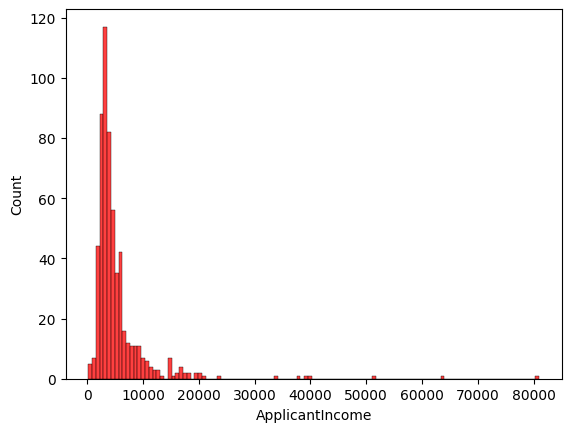

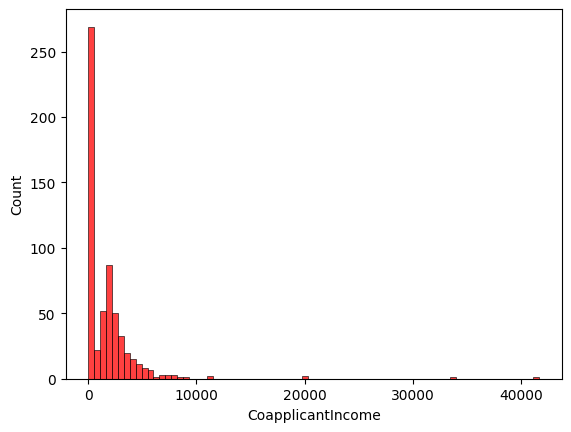

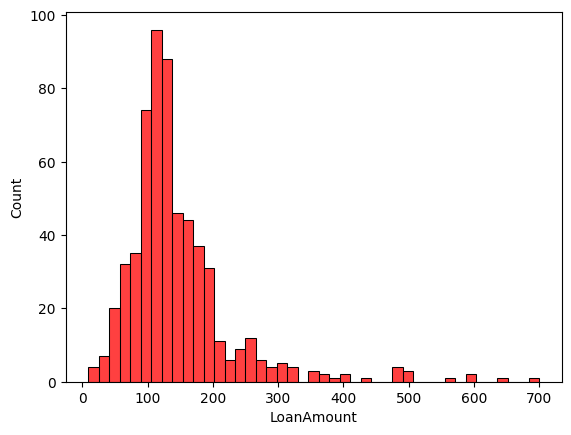

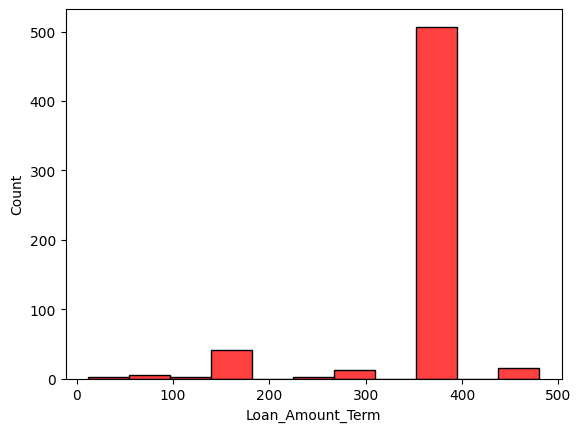

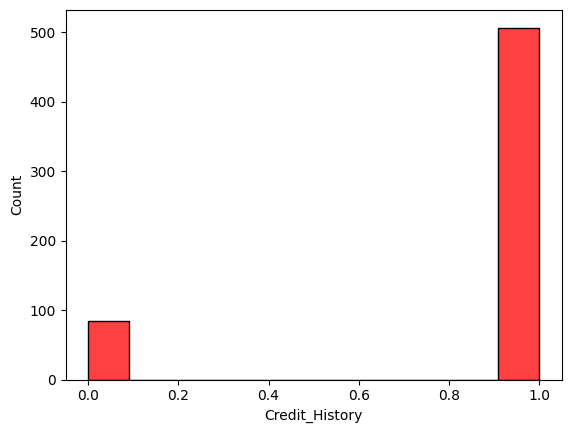

In [ ]:
columns = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']
for col in columns:
  sns.histplot(x=df[col],data=df,color='red')
  plt.show()

ApplicantIncome & CoapplicantIncome:

The distributions are right-skewed, meaning most applicants have lower incomes, with a few high-income outliers.

LoanAmount:

The histogram shows higher loan amounts are less frequent, while lower loan amounts are more common.

Credit History:

A large proportion of applicants have a credit history (value = 1), indicating that most loan applicants have prior borrowing experience.
This suggests that credit history could be a significant factor in loan approvals.

**Identify potential outliers and visualize the spread of data by using boxplot.**

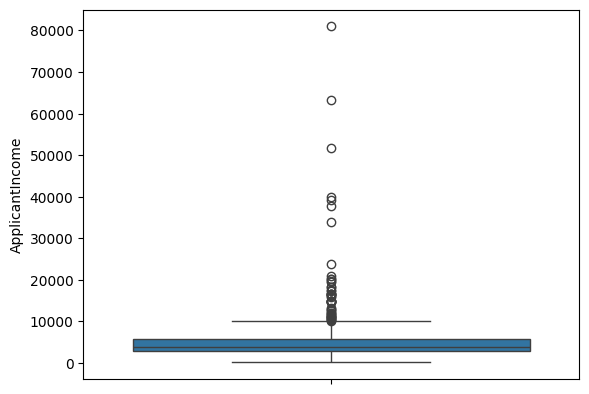

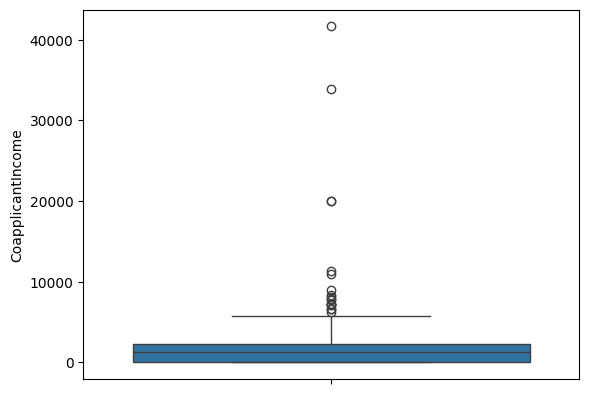

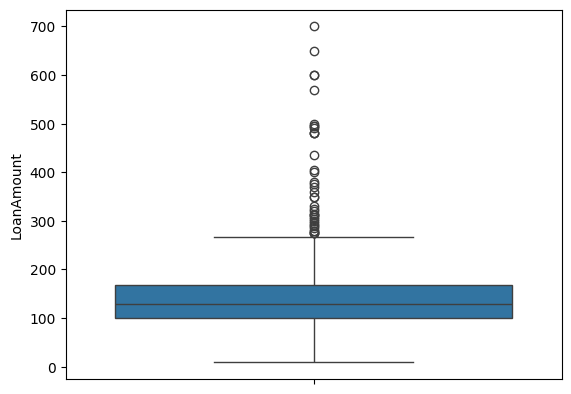

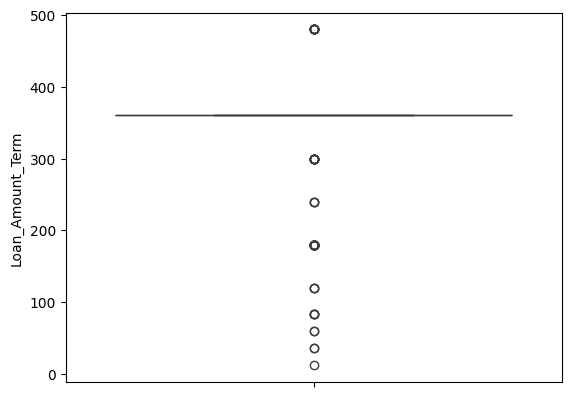

In [ ]:
columns = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']
for i in columns:
  sns.boxplot(df[i])
  plt.show()



ApplicantIncome & CoapplicantIncome:

Several outliers exist in higher income ranges, indicating that some applicants earn significantly more than others.

LoanAmount:

The presence of outliers in loan amounts suggests that some applicants request unusually high loans, which may affect approval chances.

In [ ]:
def outliers(df):
  q1 = df['Loan_Amount_Term'].quantile(0.25)
  q3 = df['Loan_Amount_Term'].quantile(0.75)
  iqr= q3-q1
  lw = q1 - 1.5*iqr
  uw = q3 + 1.5*iqr
  print(f'Lower wisker : {lw}')
  print(f'Upper wisker : {uw}')

  df['Loan_Amount_Term'] = df['Loan_Amount_Term'].apply(lambda x : lw if x<lw else uw if x>uw else x)
  return df

df_new = outliers(df)
df_new



Lower wisker : 360.0
Upper wisker : 360.0


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2.0,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0.0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3.0,Graduate,No,4106,0.0,40.0,360.0,1.0,Rural,Y
611,LP002983,Male,Yes,1.0,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2.0,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


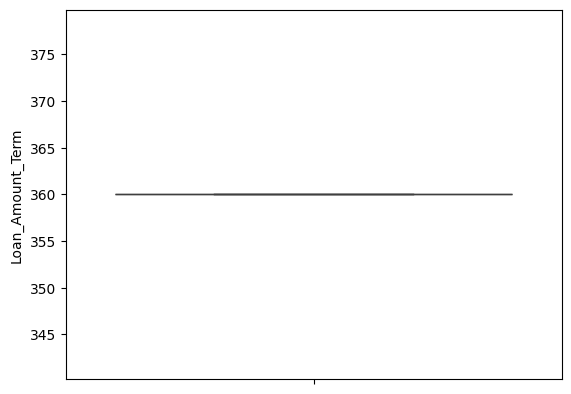

In [ ]:
sns.boxplot(df_new['Loan_Amount_Term'])
plt.show()

# **Analyze categorical variables by creating the following plots:**

**Visualize the frequency distribution of categorical variables by using barplot.**

In [ ]:
df_new.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

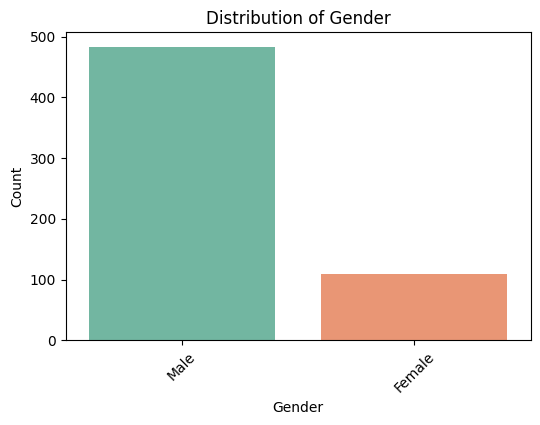

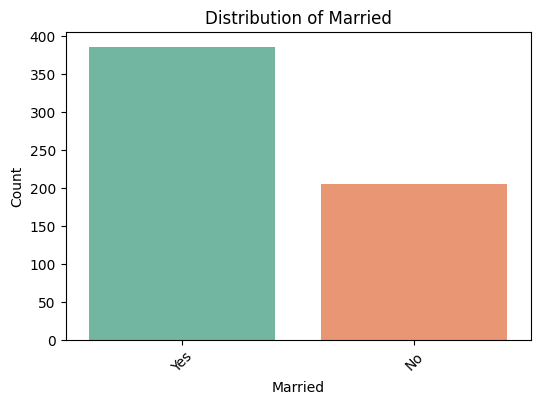

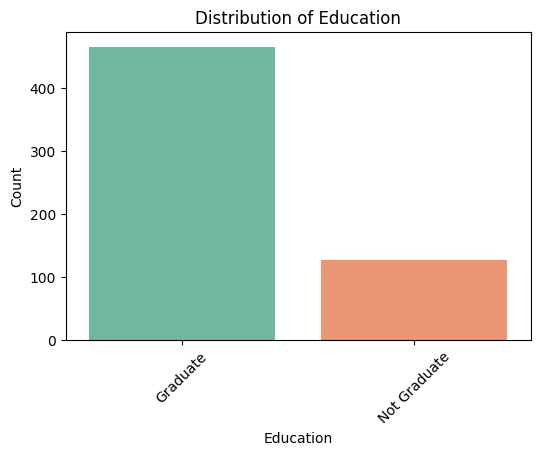

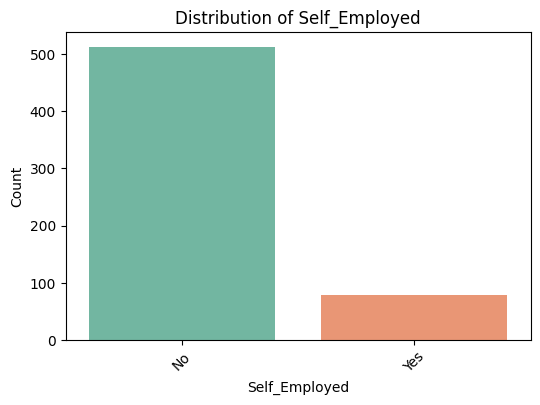

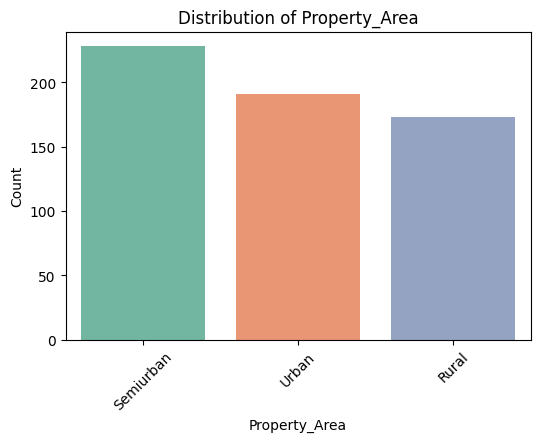

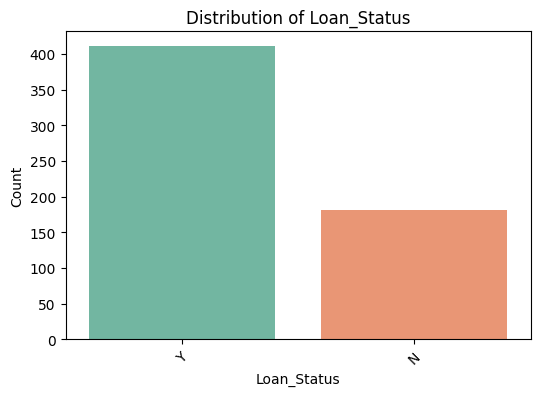

In [ ]:
columns = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']
for col in columns:
    plt.figure(figsize=(6, 4))  # Adjust figure size
    count_data = df_new[col].value_counts().reset_index()  # Get value counts
    count_data.columns = [col, 'Count']  # Rename columns

    sns.barplot(x=col, y='Count', data=count_data, palette='Set2')  # Use barplot
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)  # Rotate labels for better readability
    plt.show()

Credit History vs. Loan Status (Barplot)
Applicants with a credit history (1) are more likely to have their loans approved.
Those without a credit history (0) have a lower approval rate.
This confirms that Credit History is one of the most important factors influencing loan approvals.

**Represent the composition of categorical variables by using pie chart.**

In [ ]:
columns = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']

for col in columns:
    fig = px.pie(df_new, names=col, title=f'Distribution of {col}', color_discrete_sequence=['blue', 'orange', 'green', 'red', 'purple'])
    fig.show()

Purpose of the code is to Visualizing the distribution of categorical variables to understand how data is distributed across different categories.

The semiurban region has the most loan applicants.

A majority of applicants are graduates, which might influence their loan approval rates.

The loan approval rate is significantly higher than rejections, showing a positive trend in loan approvals.

## **Task 2.2**

**Create scatter plots to explore relationships between pairs of numeric variables.**


In [ ]:
columns = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']

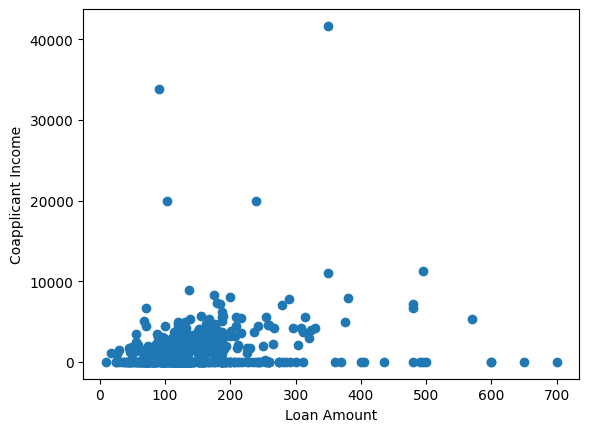

In [ ]:
plt.scatter(x='LoanAmount',y='CoapplicantIncome',data=df_new)
plt.ylabel('Coapplicant Income')
plt.xlabel('Loan Amount')
plt.show()

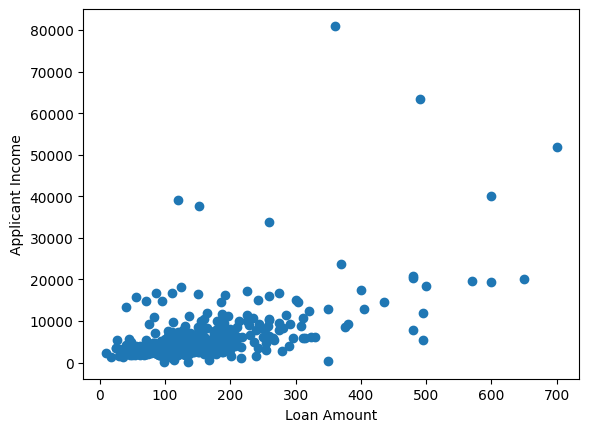

In [ ]:
plt.scatter(x='LoanAmount',y='ApplicantIncome',data=df_new)
plt.ylabel('Applicant Income')
plt.xlabel('Loan Amount')
plt.show()

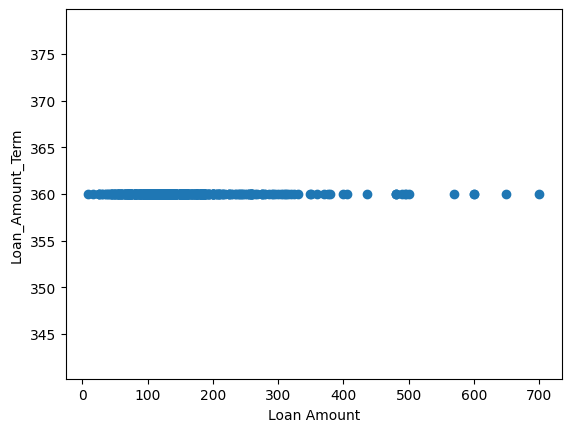

In [ ]:
plt.scatter(x='LoanAmount',y='Loan_Amount_Term',data=df_new)
plt.ylabel('Loan_Amount_Term')
plt.xlabel('Loan Amount')
plt.show()

**Insights from the Graphs**

Loan Amount vs. Co-Applicant Income:

Most co-applicant incomes are clustered around lower values.
A few cases show very high co-applicant incomes, but they are rare.
Higher loan amounts do not necessarily correspond to higher co-applicant incomes.

Loan Amount vs. Applicant Income:

Similar to co-applicant income, most applicant incomes are on the lower side.
A few outliers have significantly high incomes.
There is no strong linear relationship between applicant income and loan amount.

Loan Amount vs. Loan Term:

Most loan terms are around 360 months (30 years), indicating a standard long-term loan period.
Loan amount variations do not significantly impact the loan term, as most terms remain constant.

**Use pair plots (scatter matrix) to visualize interactions between multiple numeric variables.**

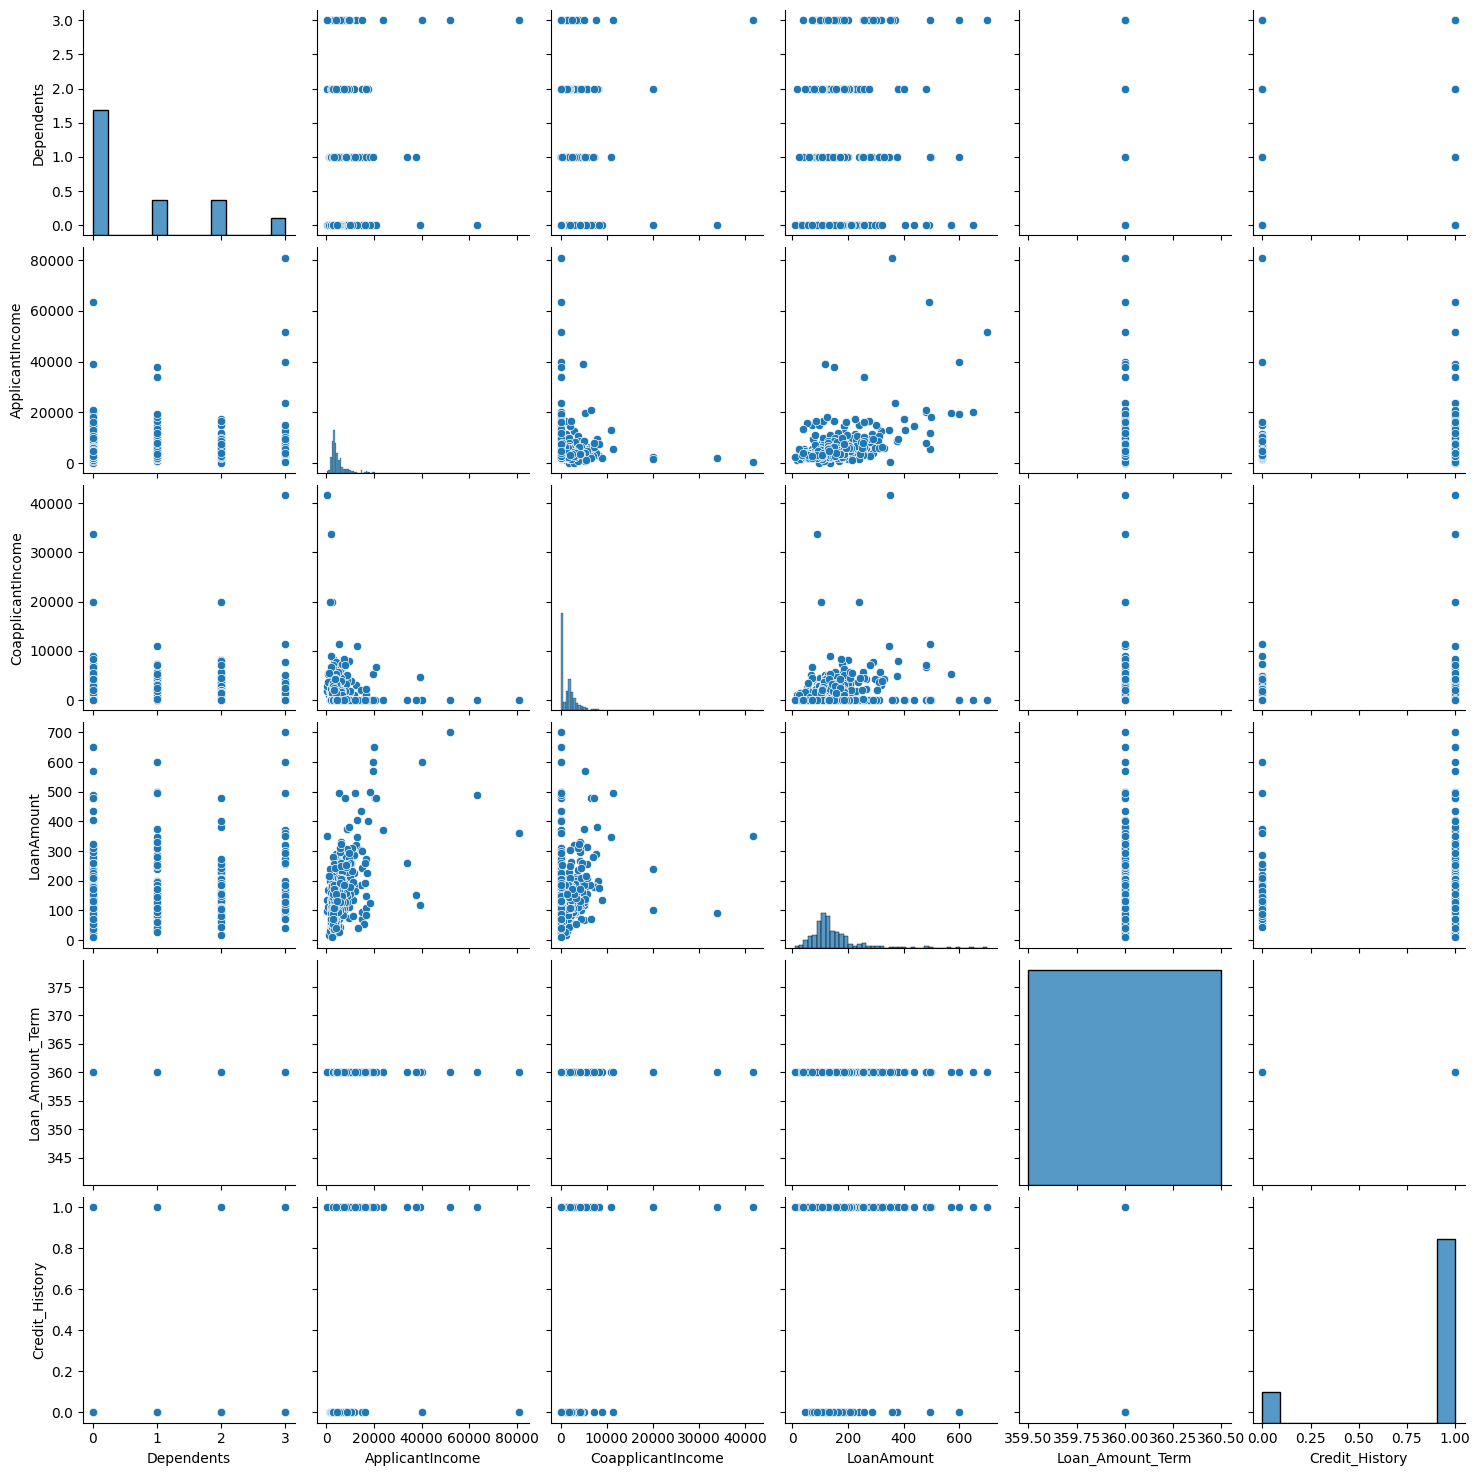

<Figure size 640x480 with 0 Axes>

In [ ]:
columns = [	'Dependents',	'ApplicantIncome'	,'CoapplicantIncome',	'LoanAmount','Loan_Amount_Term',	'Credit_History']
sns.pairplot(df_new[columns])
plt.show()
plt.tight_layout()

Relationship Between Income and Loan Amount (Pairplot)

No strong direct correlation between income and loan amount, meaning that lenders consider other factors (like credit history) more than just income when approving loans.

However, higher-income applicants tend to apply for larger loan amounts.

**Investigate the relationship between categorical and numeric variables using box plots or violin plots.**


In [ ]:
df_new.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2.0,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


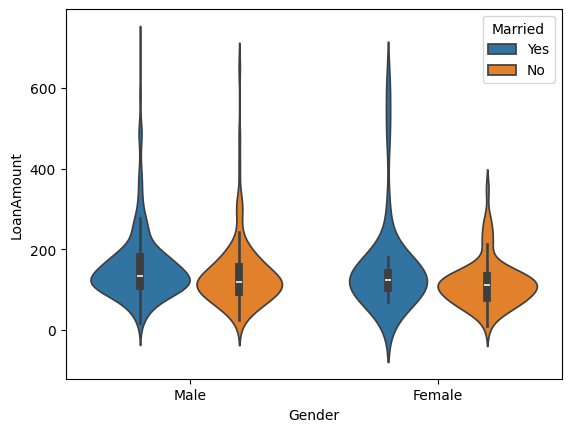

In [ ]:
sns.violinplot(x = "Gender", y="LoanAmount",hue='Married',data = df_new)
plt.show()

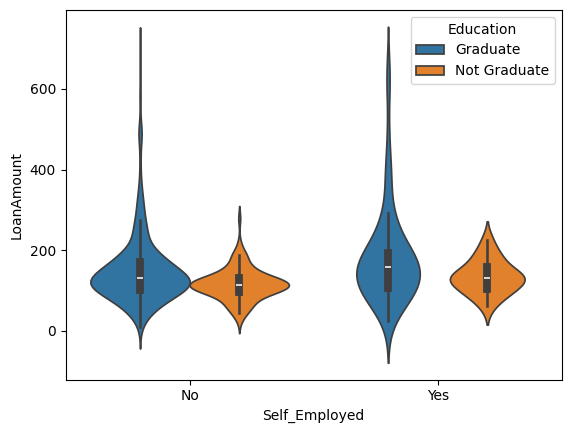

In [ ]:
sns.violinplot(x = "Self_Employed", y="LoanAmount",hue = 'Education',data = df_new)
plt.show()

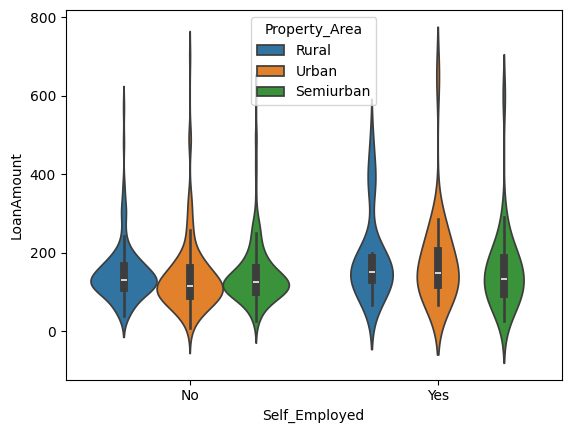

In [ ]:
sns.violinplot(x = "Self_Employed", y="LoanAmount",hue = 'Property_Area',data = df_new)
plt.show()

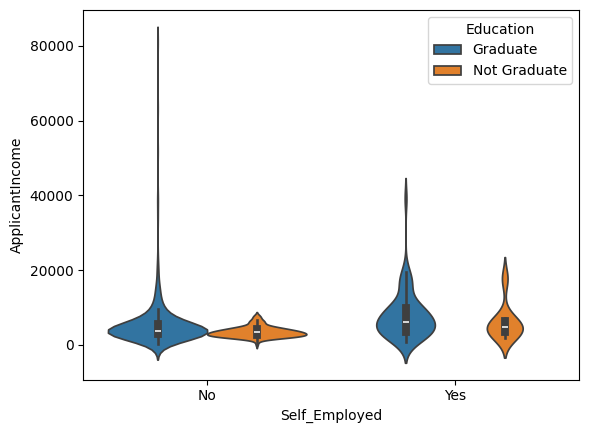

In [ ]:
sns.violinplot(x = "Self_Employed", y="ApplicantIncome",hue = 'Education',data = df_new)
plt.show()

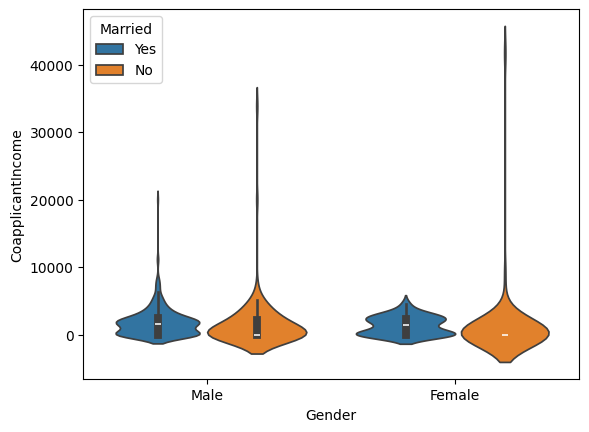

In [ ]:
sns.violinplot(x = "Gender", y="CoapplicantIncome",hue='Married',data = df_new)
plt.show()

# **Task 2.3**

**Perform a correlation analysis to identify relationships between numeric variables. Visualize correlations using a heatmap.**



In [ ]:
df_2 = df_new[['Dependents',	'ApplicantIncome'	,'CoapplicantIncome',	'LoanAmount','Credit_History']]
df_2.corr()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History
Dependents,1.000000,0.128291,0.035495,0.166106,-0.027126
ApplicantIncome,0.128291,1.000000,-0.113695,0.570909,-0.023219
CoapplicantIncome,0.035495,-0.113695,1.000000,0.188619,0.008944
LoanAmount,0.166106,0.570909,0.188619,1.000000,-0.001463
Credit_History,-0.027126,-0.023219,0.008944,-0.001463,1.000000


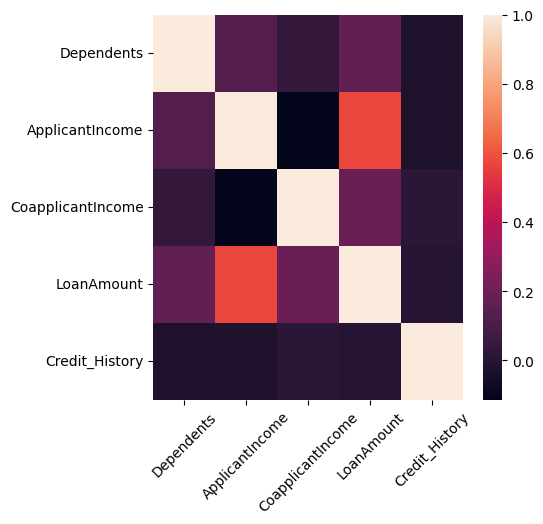

In [ ]:
plt.figure(figsize=(5,5))
sns.heatmap(df_2.corr())
plt.xticks(rotation=45)
plt.show()


Applicant Income and Loan Amount have a positive relationship, meaning that people with higher incomes tend to receive larger loan amounts.

Coapplicant Income has a weak correlation with Loan Amount, suggesting that having a coapplicant does not strongly impact loan size.

Credit History does not have a strong connection with Loan Amount, indicating that loan amounts may not depend much on past credit records.

Dependents have a very low correlation with other factors, meaning the number of dependents in a family does not significantly affect income or loan approval.

**Create a stacked bar chart to show the distribution of categorical variables across multiple categories.**

In [ ]:
df_new

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2.0,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0.0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3.0,Graduate,No,4106,0.0,40.0,360.0,1.0,Rural,Y
611,LP002983,Male,Yes,1.0,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2.0,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [ ]:
df_new['Gender'].value_counts()

,count
Gender,
Male,483
Female,109


In [ ]:
df_new['Married'].value_counts()

,count
Married,
Yes,386
No,206


In [ ]:
df_new['Education'].value_counts()

,count
Education,
Graduate,465
Not Graduate,127


In [ ]:
df_new[['Loan_ID','Credit_History']].value_counts()

,,count
Loan_ID,Credit_History,
LP001003,1.0,1
LP002301,1.0,1
LP002308,1.0,1
LP002314,1.0,1
LP002315,0.0,1
...,...,...
LP001698,1.0,1
LP001699,1.0,1
LP001702,1.0,1


In [ ]:
df_new[['Self_Employed','Credit_History']].value_counts()

Self_Employed  Credit_History
No             1.0               439
               0.0                74
Yes            1.0                68
               0.0                11
Name: count, dtype: int64

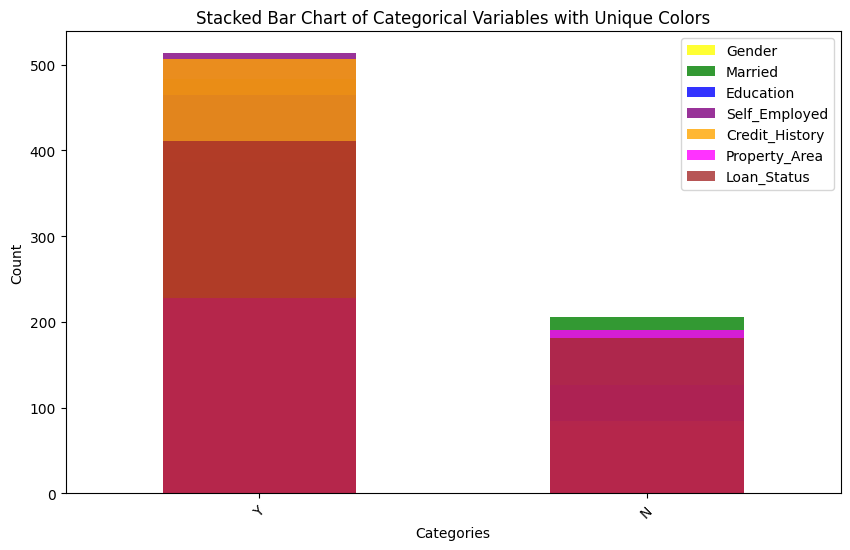

In [ ]:
categories = ['Gender', 'Married', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area', 'Loan_Status']

# Define unique colors for each category
colors = ['yellow', 'green', 'blue', 'purple', 'orange', 'magenta', 'brown']

# Create a figure
plt.figure(figsize=(10, 6))

# Create a stacked bar chart with unique colors
for i, category in enumerate(categories):
    df[category].value_counts().plot(kind='bar', stacked=True, color=colors[i], label=category, alpha=0.8)

# Labels and title
plt.xlabel("Categories")
plt.ylabel("Count")
plt.title("Stacked Bar Chart of Categorical Variables with Unique Colors")
plt.legend()
plt.xticks(rotation=45)
plt.show()

1. More Male Applicants than Female

The number of male applicants is higher than female applicants.
This suggests that men apply for loans more often than women.

2. Married People Apply More for Loans

A larger number of married individuals apply for loans compared to unmarried people.
This might be because married people need loans for family needs, home purchases, or other expenses.

3. Education Level Affects Loan Applications

People with higher education degrees apply for loans more often.
This could mean that educated people are more aware of loan options or have better financial stability.

4. Fewer Self-Employed People Apply for Loans

The number of self-employed applicants is lower compared to salaried individuals.
This might be because self-employed people find it harder to meet the bank’s loan approval criteria.

5. Credit History is Important

Applicants with a good credit history have a higher chance of getting loan approval.
Those with no credit history seem to have lower approval rates.

6. Loan Applications by Location

More applications come from urban and semi-urban areas than rural areas.
This could be because people in cities have easier access to banks and financial institutions.

7. Income and Loan Amount Connection

People with higher incomes apply for and get approved for larger loan amounts.
Lower-income applicants may face challenges in getting bigger loans.

# **Conclusion**

Credit History is the most crucial factor in loan approval.

 * Applicants with a good credit history have a much higher chance of approval.

Income does not directly determine loan approval, but higher-income applicants tend to request larger loan amounts.

There are significant outliers in income and loan amounts, meaning the dataset contains extreme cases that could impact model performance.

Most loans follow a standard loan term, suggesting that banks and lenders have set standard repayment durations.

To improve loan approval predictions, a model should focus on credit history, loan amount, and income distribution while handling outliers carefully.